## KERNELS
- We think of an image as a big matrix, then we can think of a kernel or convolutional matrix as a tiny matrix that is used for blurring, sharpening, edge detection, and other image processing functions.


## MORPHOLOGICAL OPERATIONS

- Morphological operations are simple transformations applied to binary or grayscale images.
- More specifically, we apply morphological operations to shapes and structures inside of images.
- Morphological operations “probe” an image with a structuring element.
- This structuring element defines the neighborhood to be examined around each pixel.
- And based on the given operation and the size of the structuring element we are able to adjust our output image.
- Structuring element is a type of kernel or mask. However, instead of applying a convolution, we are only going to perform simple tests on the pixels.

In [1]:
import sys
sys.path.append("../")

In [2]:
import cv2
import argparse
from cv_imshow import display_image, create_subplot
from matplotlib import pyplot as plt

In [3]:
args = {
    "image":"../images/pyimagesearch_logo.png",
    "cimage":"../images/morph_car.png"
}

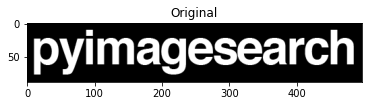

In [4]:
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image("Original", image)

### Erosion: 
- A foreground pixel in the input image will be kept only if ALL pixels inside the structuring element are > 0. Otherwise, the pixels are set to 0 (i.e. background).
- Useful for removing small blobs in an image or disconnecting two connected objects.

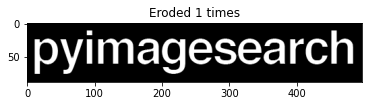

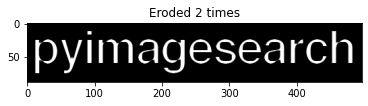

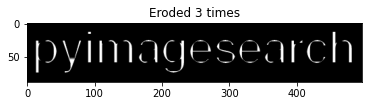

In [5]:
for i in range(0,3):
    eroded = cv2.erode(gray.copy(), None, iterations=i+1)
    display_image("Eroded {} times".format(i+1), eroded)

### Dilation: 
- Opposite of erosion. Utilizes structuring elements - a center pixel p of the structuring element is set to white if ANY pixel in the structuring element is > 0. 
- Useful for joining broken parts of an image together.

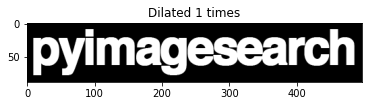

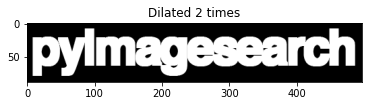

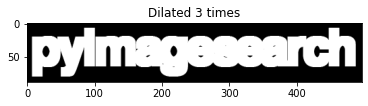

In [6]:
for i in range(0,3):
    dilated = cv2.dilate(gray.copy(), None, iterations=i+1)
    display_image("Dilated {} times".format(i+1), dilated)

### Opening
- Eroson followed by dilation.
- allows us to remove small blobs from an image:
- first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

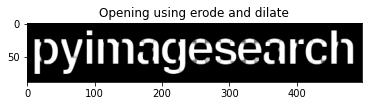

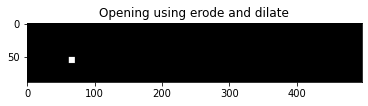

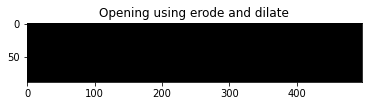

In [7]:
#without using morphologicalEx. 
#Using only erode and dilate
#Very inaccurate
kernels = [(3,3), (5,5), (7,7)]
for kernelSize in kernels:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    eroded = cv2.erode(gray.copy(), kernel, iterations=3)
    dilated = cv2.dilate(eroded.copy(), kernel, iterations=2)
    display_image("Opening using erode and dilate", dilated)

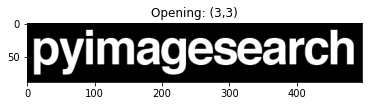

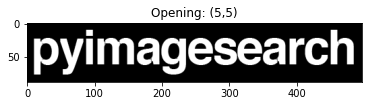

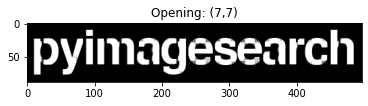

In [8]:
#Using Morphological ex

for kernelSize in kernels:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    display_image("Opening: ({},{})".format(kernelSize[0],kernelSize[1]), opening)

### Closing: 
- Dilation folowed by erosion
- Closing is used to close holes inside of objects or for connecting components together.

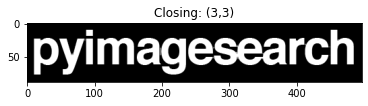

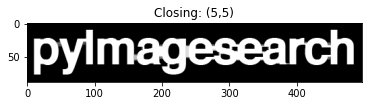

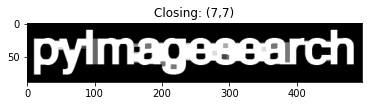

In [9]:
for kernelSize in kernels:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    display_image("Closing: ({},{})".format(kernelSize[0],kernelSize[1]), closing)

### Morphological gradient: 
- Difference between erosion and dilation
- Useful for determining the outline of a particular object of an image

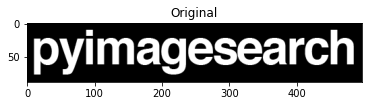

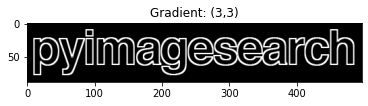

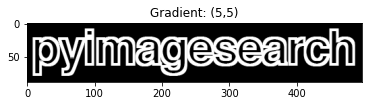

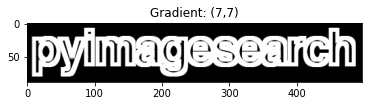

In [10]:
display_image("Original", image)

for kernelSize in kernels:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    grad = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
    display_image("Gradient: ({},{})".format(kernelSize[0],kernelSize[1]), grad)

### Top Hat/white hat: 
- Difference between original(grayscale) image and opening
- Used to reveal bright regions of an image on dark backgrounds.

### Black Hat
- Difference between the closing of the input image and the input image itself.
- eveal dark regions (i.e. the license plate text) against light backgrounds (i.e. the license plate itself).

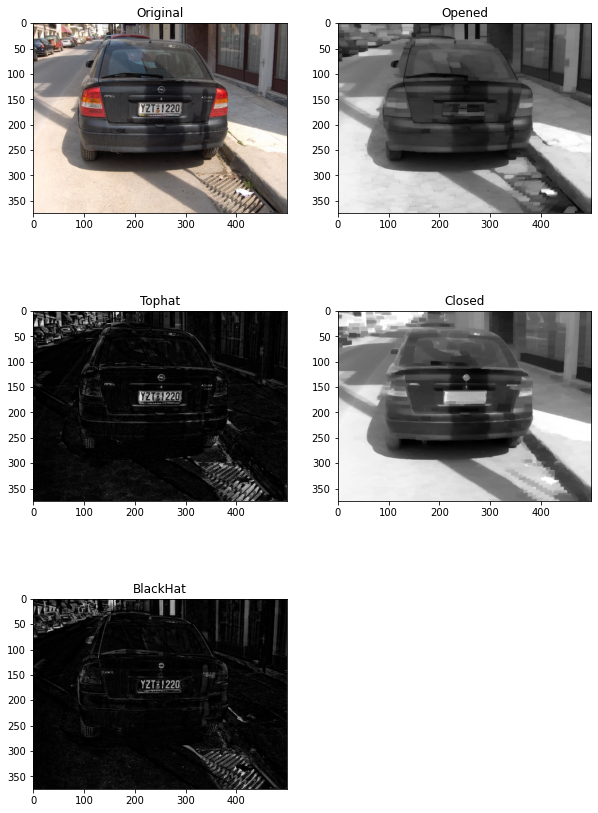

In [11]:
#without using morphologyEx
carImage = cv2.imread(args["cimage"])
carGray = cv2.cvtColor(carImage, cv2.COLOR_BGR2GRAY)
kernelSize = (13,5)
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)

fig = plt.figure(figsize=(10,15))
#Top hat by subtracting opening from original
opened = cv2.morphologyEx(carGray.copy(), cv2.MORPH_OPEN, rectKernel)
topHat = carGray - opened
create_subplot(fig, 3, 2, 1, "Original", carImage)
create_subplot(fig, 3, 2, 2, "Opened", opened)
create_subplot(fig, 3, 2, 3, "Tophat", topHat)

#Black Hat by subtracting closing from original
closed = cv2.morphologyEx(carGray.copy(), cv2.MORPH_CLOSE, rectKernel)
blackHat = closed - carGray
create_subplot(fig, 3, 2, 4, "Closed", closed)
create_subplot(fig, 3, 2, 5, "BlackHat", blackHat)

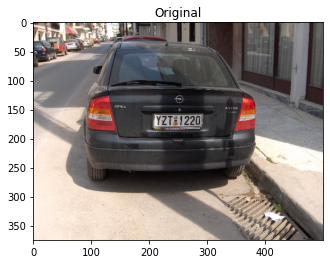

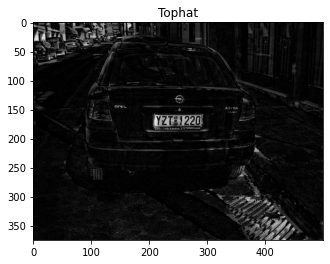

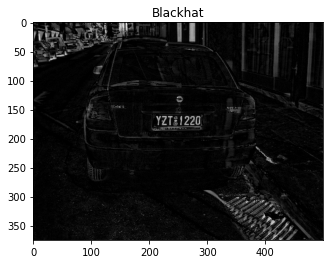

In [12]:

#blackhat
blackhat = cv2.morphologyEx(carGray.copy(), cv2.MORPH_BLACKHAT, rectKernel)

#tophat
tophat = cv2.morphologyEx(carGray.copy(), cv2.MORPH_TOPHAT, rectKernel)

display_image("Original", carImage)
display_image("Tophat", tophat)
display_image("Blackhat", blackhat)